**Hello**, this is for the Machine Learning assignment #3.

# Download the **data**.

In [26]:
import os
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DOWNLOAD_ROOT = "https://github.com/108hills/machinetesting/raw/main/"
ARCHIVE_PATH = os.path.join("datasets", "archive")
DATA_FILE_URL = DOWNLOAD_ROOT + "archive/Data%20pricing.xlsx"

def fetch_data_file(data_file_url=DATA_FILE_URL, archive_path=ARCHIVE_PATH):
    if not os.path.isdir(archive_path):
        os.makedirs(archive_path)
    file_path = os.path.join(archive_path, "Data pricing.xlsx")
    urllib.request.urlretrieve(data_file_url, file_path)
    return file_path

Download the data file

In [10]:
data_file_path = fetch_data_file()

In [11]:
import pandas as pd

def load_data_file(archive_path=ARCHIVE_PATH):
    csv_path = os.path.join(archive_path, "Data pricing.xlsx")
    return pd.read_csv(csv_path)

# Quick Look at the **Data Structure**

In [13]:
def load_data(file_path):
    return pd.read_excel(file_path)

data = load_data(data_file_path)

In [16]:
print(data.head())

     Continental region  Plans measured  \
0             NEAR EAST              24   
1        WESTERN EUROPE              33   
2               OCEANIA              17   
3        WESTERN EUROPE              12   
4  ASIA (EX. NEAR EAST)              16   

   Average price of 1GB (local currency) Currency  \
0                                   0.08      ILS   
1                                   0.08      EUR   
2                                   0.20      FJD   
3                                   0.09      EUR   
4                                   0.12      USD   

   Conversion rate (USD) (Frozen 07/09/2023)  Average price of 1GB (USD)  \
0                                    0.25988                        0.02   
1                                    1.07157                        0.09   
2                                    0.44000                        0.09   
3                                    1.07157                        0.10   
4                                    1.000

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Continental region                         237 non-null    object 
 1   Plans measured                             237 non-null    int64  
 2   Average price of 1GB (local currency)      237 non-null    float64
 3   Currency                                   237 non-null    object 
 4   Conversion rate (USD) (Frozen 07/09/2023)  237 non-null    float64
 5   Average price of 1GB (USD)                 237 non-null    float64
 6   Cheapest 1GB (Local currency)              237 non-null    float64
 7   Cheapest 1GB for 30 days (USD)             237 non-null    float64
 8   Most expensive 1GB (Local currency)        237 non-null    float64
 9   Most expensive 1GB (USD)                   237 non-null    float64
 10  Sample date               

In [17]:
print(data.describe())

       Plans measured  Average price of 1GB (local currency)  \
count      237.000000                             237.000000   
mean        23.873418                             782.758101   
std         15.677659                            4364.202521   
min          2.000000                               0.080000   
25%         11.000000                               2.080000   
50%         21.000000                               7.320000   
75%         34.000000                              83.330000   
max         60.000000                           63333.330000   

       Conversion rate (USD) (Frozen 07/09/2023)  Average price of 1GB (USD)  \
count                                 237.000000                  237.000000   
mean                                    0.462019                    2.589198   
std                                     0.532678                    5.179471   
min                                     0.000020                    0.020000   
25%                    

# **Visualization**

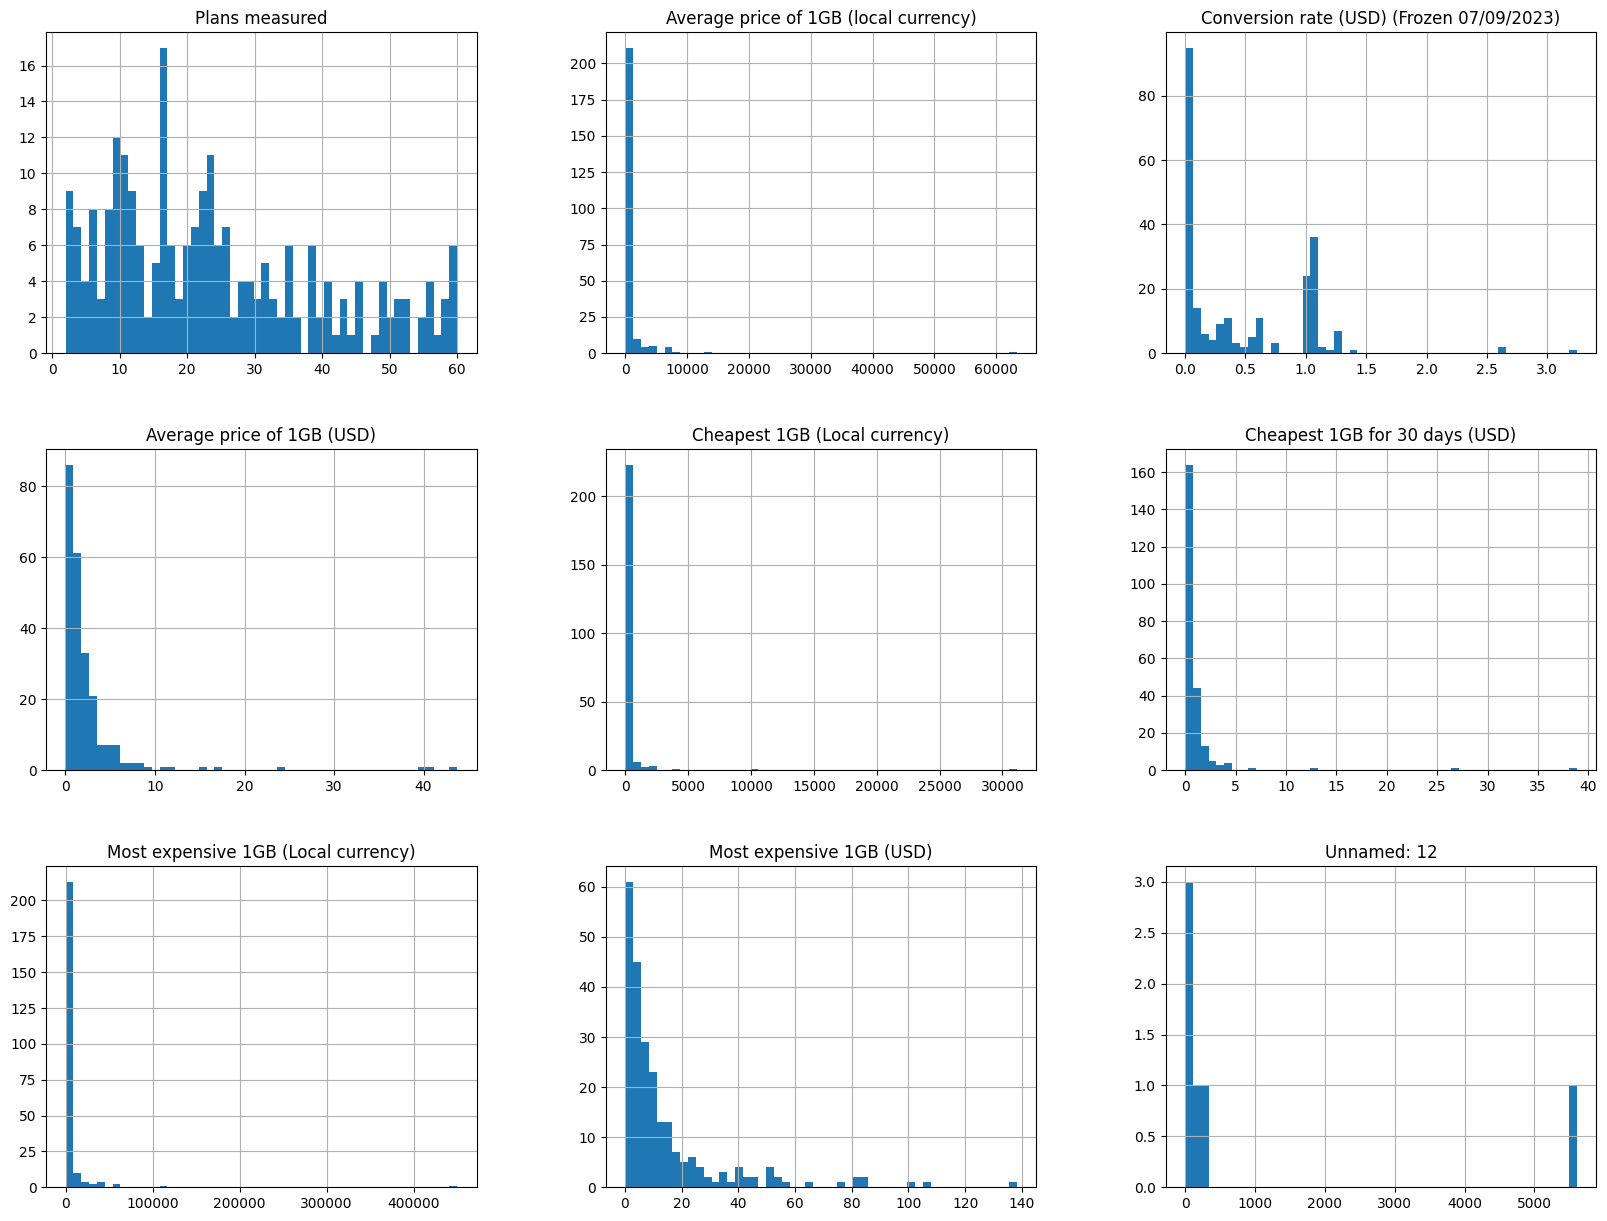

In [18]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [30]:
data["Continental region"] = data["Continental region"].str.title()

<ipython-input-28-80a7c7c5dc73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg_prices.index, y=region_avg_prices.values, palette="viridis")


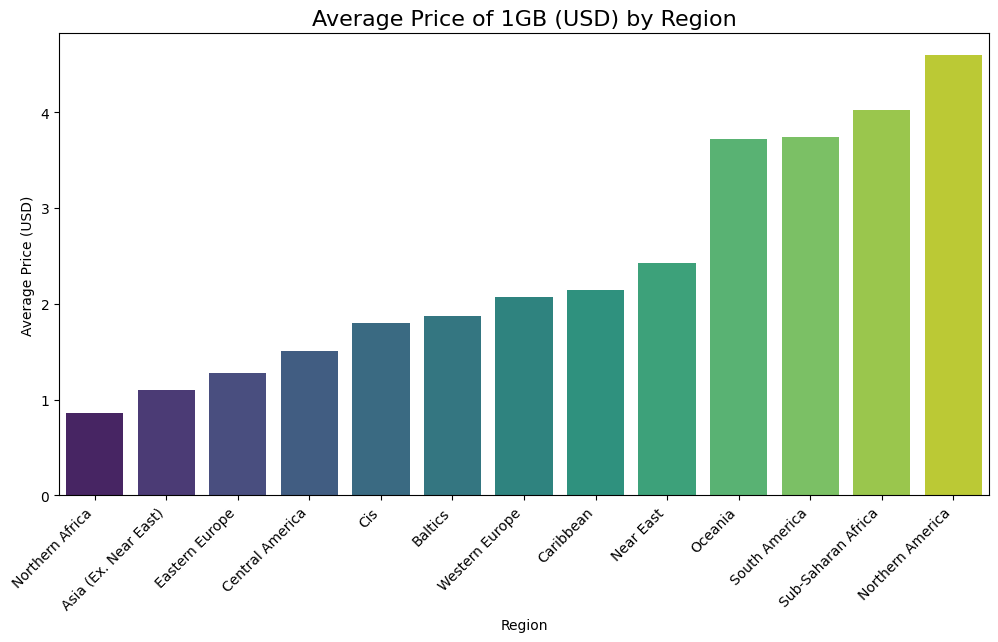

In [28]:
region_avg_prices = data.groupby("Continental region")["Average price of 1GB (USD)"].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=region_avg_prices.index, y=region_avg_prices.values, palette="viridis")
plt.title("Average Price of 1GB (USD) by Region", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Price (USD)")
plt.xlabel("Region")
plt.show()

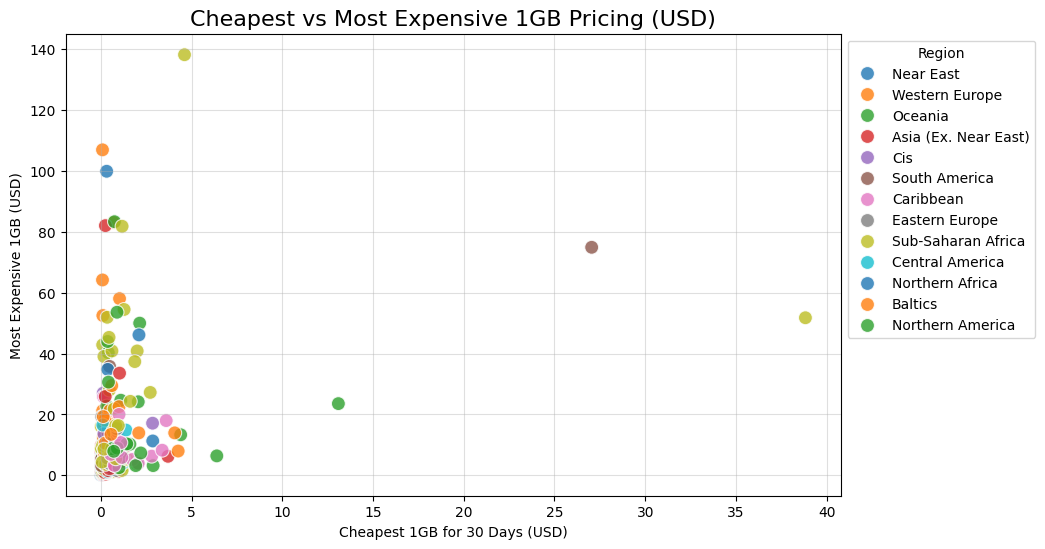

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x="Cheapest 1GB for 30 days (USD)",
    y="Most expensive 1GB (USD)",
    hue="Continental region",
    palette="tab10",
    s=100,
    alpha=0.8
)
plt.title("Cheapest vs Most Expensive 1GB Pricing (USD)", fontsize=16)
plt.xlabel("Cheapest 1GB for 30 Days (USD)")
plt.ylabel("Most Expensive 1GB (USD)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Region")
plt.grid(alpha=0.4)
plt.show()

# Correlations

In [21]:
if data.select_dtypes(include=['number']).shape[1] > 0:
    corr_matrix = data.select_dtypes(include=['number']).corr()
    print(corr_matrix)

                                           Plans measured  \
Plans measured                                   1.000000   
Average price of 1GB (local currency)            0.113707   
Conversion rate (USD) (Frozen 07/09/2023)       -0.215600   
Average price of 1GB (USD)                      -0.183785   
Cheapest 1GB (Local currency)                    0.083371   
Cheapest 1GB for 30 days (USD)                  -0.227556   
Most expensive 1GB (Local currency)              0.135427   
Most expensive 1GB (USD)                         0.007602   
Unnamed: 12                                     -0.312046   

                                           Average price of 1GB (local currency)  \
Plans measured                                                          0.113707   
Average price of 1GB (local currency)                                   1.000000   
Conversion rate (USD) (Frozen 07/09/2023)                              -0.155107   
Average price of 1GB (USD)                           